In [42]:
import pandas as pd
import numpy as np

# Load the sleep data
file_path = "sleeps.csv"
sleep_data = pd.read_csv(file_path)

sleep_data = sleep_data.replace([np.inf, -np.inf], np.nan)

# Display the first few rows of the data
sleep_data.head()

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %,Nap
0,2024-06-23 20:24:26,NaN,UTC-04:00,2024-06-23 20:24:26,2024-06-24 05:44:09,100.0,15.9,504.0,557.0,288.0,77.0,139.0,53.0,457.0,0.0,90.0,NaN,False
1,2024-06-22 23:00:22,2024-06-23 20:24:26,UTC-04:00,2024-06-22 23:00:22,2024-06-23 07:00:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2024-06-15 21:42:59,2024-06-16 21:42:59,UTC+01:00,2024-06-15 21:42:59,2024-06-16 06:47:05,100.0,15.5,477.0,544.0,371.0,101.0,5.0,67.0,457.0,0.0,87.0,73.0,False
3,2024-06-14 22:23:57,2024-06-15 21:42:59,UTC+01:00,2024-06-14 22:23:57,2024-06-15 07:18:40,100.0,15.3,471.0,522.0,343.0,76.0,52.0,51.0,463.0,5.0,90.0,74.0,False
4,2024-06-13 23:24:15,2024-06-14 22:23:57,UTC+01:00,2024-06-13 23:24:15,2024-06-14 08:28:31,98.0,15.5,449.0,522.0,284.0,103.0,62.0,73.0,458.0,0.0,86.0,57.0,False


In [43]:
# Check for missing values
print(sleep_data.isnull().sum())

# Fill or drop missing values if necessary
sleep_data = sleep_data.dropna()

# Convert date columns to datetime objects if needed
sleep_data['Cycle start time'] = pd.to_datetime(sleep_data['Cycle start time'])

Cycle start time               0
Cycle end time                 1
Cycle timezone                 0
Sleep onset                    0
Wake onset                     0
Sleep performance %            1
Respiratory rate (rpm)         1
Asleep duration (min)          1
In bed duration (min)          1
Light sleep duration (min)     1
Deep (SWS) duration (min)      1
REM duration (min)             1
Awake duration (min)           1
Sleep need (min)               1
Sleep debt (min)               1
Sleep efficiency %             1
Sleep consistency %           15
Nap                            0
dtype: int64


                    Cycle start time  Sleep performance %  \
count                            168           168.000000   
mean   2024-03-24 09:41:33.922619136            89.053571   
min              2024-01-01 00:23:38            28.000000   
25%       2024-02-11 16:56:05.500000            84.000000   
50%              2024-03-24 08:23:21            91.000000   
75%       2024-05-05 02:38:04.500000            99.250000   
max              2024-06-15 21:42:59           100.000000   
std                              NaN            11.641994   

       Respiratory rate (rpm)  Asleep duration (min)  In bed duration (min)  \
count              168.000000             168.000000             168.000000   
mean                15.213690             442.357143             513.398810   
min                 12.200000             152.000000             177.000000   
25%                 14.675000             413.750000             484.500000   
50%                 15.300000             449.000000   

c:\Users\richa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


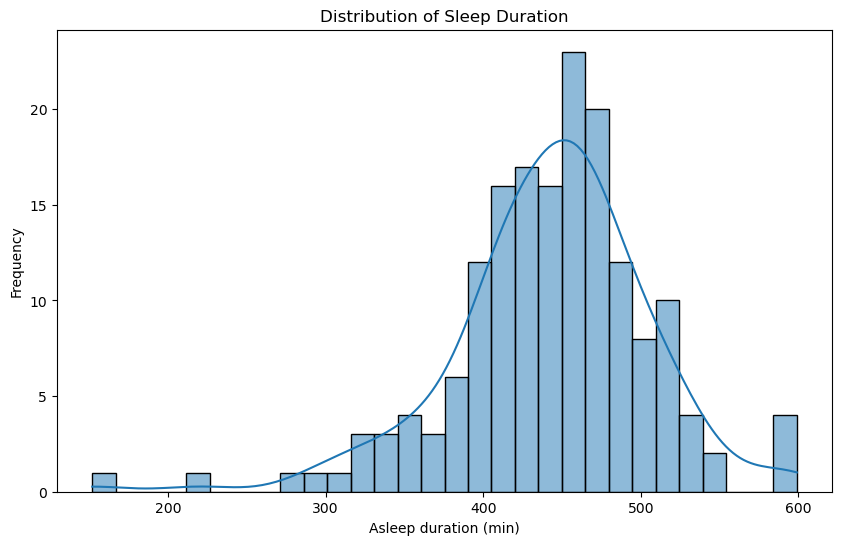

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(sleep_data.describe())

# Histogram of sleep duration
plt.figure(figsize=(10, 6))
sns.histplot(sleep_data['Asleep duration (min)'], bins=30, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Asleep duration (min)')
plt.ylabel('Frequency')
plt.show()

c:\Users\richa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\richa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


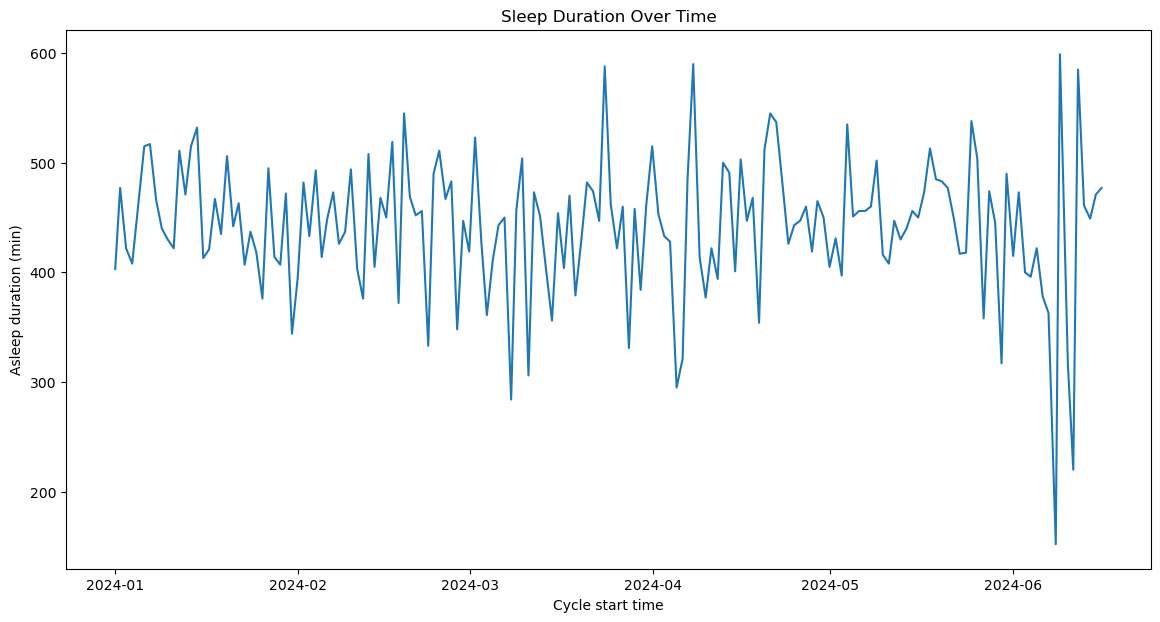

In [45]:
# Time series plot of sleep duration
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(14, 7))
sns.lineplot(x='Cycle start time', y='Asleep duration (min)', data=sleep_data)
plt.title('Sleep Duration Over Time')
plt.xlabel('Cycle start time')
plt.ylabel('Asleep duration (min)')
plt.show()
